# New York City Taxi Trip Duration - [link](https://www.kaggle.com/competitions/nyc-taxi-trip-duration)
- type: Regression
- score: RMSE

[EDA notebook](https://www.kaggle.com/code/headsortails/nyc-taxi-eda-update-the-fast-the-curious#external-data)
___

File descriptions
- `train.csv` - the training set (contains 1458644 trip records)
- `test.csv` - the testing set (contains 625134 trip records)
- `sample_submission.csv` - a sample submission file in the correct format_



**Features**
- `id` - a unique identifier for each trip
- `vendor_id` - a code indicating the provider associated with the trip record
- `pickup_datetime` - date and time when the meter was engaged
- `dropoff_datetime` - date and time when the meter was disengaged
- `passenger_count` - the number of passengers in the vehicle (driver entered value)
- `pickup_longitude` - the longitude where the meter was engaged
- `pickup_latitude` - the latitude where the meter was engaged
- `dropoff_longitude` - the longitude where the meter was disengaged
- `dropoff_latitude` - the latitude where the meter was disengaged
- `store_and_fwd_flag` - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

Target
- `trip_duration` - duration of the trip in seconds


In [1]:
import os
import shutil
import pandas as pd
import numpy as np
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

import random
DEFAULT_RANDOM_SEED = 2021
def set_all_seeds(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
set_all_seeds(seed=DEFAULT_RANDOM_SEED)

os.chdir('C:/_Github repositories/New-York-City-Taxi-Trip-Duration')

## 1. Loading data + checking

In [2]:
train = pd.read_csv('data/train.csv')
display(train.head())
train.describe()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1           -73.982           40.768            -73.965   
1                1           -73.980           40.739            -73.999   
2                1           -73.979           40.764            -74.005   
3                1           -74.010           40.720            -74.012   
4                1           -73.973           40.793            -73.973   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0            40.766                  N            455  
1            40.731                  N            663  
2            40.710                  N           2124  
3            40.707                  N            429  
4            40.783                  N            435

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count 1458644.000      1458644.000       1458644.000      1458644.000   
mean        1.535            1.665           -73.973           40.751   
std         0.499            1.314             0.071            0.033   
min         1.000            0.000          -121.933           34.360   
25%         1.000            1.000           -73.992           40.737   
50%         2.000            1.000           -73.982           40.754   
75%         2.000            2.000           -73.967           40.768   
max         2.000            9.000           -61.336           51.881   

       dropoff_longitude  dropoff_latitude  trip_duration  
count        1458644.000       1458644.000    1458644.000  
mean             -73.973            40.752        959.492  
std                0.071             0.036       5237.432  
min             -121.933            32.181          1.000  
25%              -73.991            40.736        397.000  
50%              -73.980            40.755        662.000  
75%              -73.963            40.770       1075.000  
max              -61.336            43.921    3526282.000

In [3]:
test = pd.read_csv('data/test.csv')
display(test.head())
test.describe()

id  vendor_id      pickup_datetime  passenger_count  \
0  id3004672          1  2016-06-30 23:59:58                1   
1  id3505355          1  2016-06-30 23:59:53                1   
2  id1217141          1  2016-06-30 23:59:47                1   
3  id2150126          2  2016-06-30 23:59:41                1   
4  id1598245          1  2016-06-30 23:59:33                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.988           40.732            -73.990            40.757   
1           -73.964           40.680            -73.960            40.655   
2           -73.997           40.738            -73.986            40.730   
3           -73.956           40.772            -73.986            40.730   
4           -73.970           40.761            -73.962            40.756   

  store_and_fwd_flag  
0                  N  
1                  N  
2                  N  
3                  N  
4                  N

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count 625134.000       625134.000        625134.000       625134.000   
mean       1.535            1.662           -73.974           40.751   
std        0.499            1.311             0.073            0.030   
min        1.000            0.000          -121.933           37.390   
25%        1.000            1.000           -73.992           40.737   
50%        2.000            1.000           -73.982           40.754   
75%        2.000            2.000           -73.967           40.768   
max        2.000            9.000           -69.249           42.815   

       dropoff_longitude  dropoff_latitude  
count         625134.000        625134.000  
mean             -73.973            40.752  
std                0.073             0.036  
min             -121.933            36.601  
25%              -73.991            40.736  
50%              -73.980            40.755  
75%              -73.963            40.770  
max              -67.497            48.858

- **2 vendor IDs total (maybe analyze separatly)**
- **coordinates features**
- **passenger count (moth max 9 test/train)**
- **time feature (requires work)**
- **flag (info sent immediately or no) - possible to find "bad internet areas"**

test doesn't have 2 columns `trip_duration` and `dropoff_time`

### Missing values test
- **everything alright**

In [ ]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

### Combining `test` and `train` (for consistency checks)

In [14]:
df = pd.concat([train, test], ignore_index=True)
display(df.head())
df.isna().sum()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1           -73.982           40.768            -73.965   
1                1           -73.980           40.739            -73.999   
2                1           -73.979           40.764            -74.005   
3                1           -74.010           40.720            -74.012   
4                1           -73.973           40.793            -73.973   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0            40.766                  N        455.000  
1            40.731                  N        663.000  
2            40.710                  N       2124.000  
3            40.707                  N        429.000  
4            40.783                  N        435.000

id                         0
vendor_id                  0
pickup_datetime            0
dropoff_datetime      625134
passenger_count            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
store_and_fwd_flag         0
trip_duration         625134
dtype: int64

### Feature type change
- date do `datetime`
- `vendor_id` and `passenger_count` to categorical

In [135]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])
train['vendor_id'] = train['vendor_id'].astype('category')
train['passenger_count'] = train['passenger_count'].astype('category')

In [136]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['vendor_id'] = test['vendor_id'].astype('category')
test['passenger_count'] = test['passenger_count'].astype('category')

In [22]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['vendor_id'] = df['vendor_id'].astype('category')
df['passenger_count'] = df['passenger_count'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083778 entries, 0 to 2083777
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  object        
 1   vendor_id           category      
 2   pickup_datetime     datetime64[ns]
 3   dropoff_datetime    datetime64[ns]
 4   passenger_count     category      
 5   pickup_longitude    float64       
 6   pickup_latitude     float64       
 7   dropoff_longitude   float64       
 8   dropoff_latitude    float64       
 9   store_and_fwd_flag  object        
 10  trip_duration       float64       
dtypes: category(2), datetime64[ns](2), float64(5), object(2)
memory usage: 147.1+ MB


### Checking whether or not `trip duration` calculated poorly
- **everything is alright**

In [27]:
interval_seconds = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()
print((np.abs(interval_seconds - df['trip_duration']) > 0).sum())

0


## 2. Features visualization
- NYC map (folium)
    - most trips are around Manhatten
    - other notable places (JFK airport, La Guardia airport)

In [32]:
import folium

# Sample 8000 random rows from your DataFrame (train)
foo = train.sample(n=8000, random_state=1234)

# Create a folium map centered on the mean location
map_center = [foo['pickup_latitude'].mean(), foo['pickup_longitude'].mean()]
m = folium.Map(location=map_center, tiles='Stamen Terrain', zoom_start=11)  # Esri.NatGeoWorldMap is not always available, use Stamen as an alternative

folium.TileLayer(
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}",
    attr="Esri",
    name="Esri NatGeoWorldMap",
    overlay=False,
    control=True
).add_to(m)

# Add blue circle markers
for _, row in foo.iterrows():
    folium.CircleMarker(
        location=[row['pickup_latitude'], row['pickup_longitude']],
        radius=1,
        color='blue',
        fill=True,
        fill_opacity=0.3
    ).add_to(m)

# Save or display
m

In [122]:
display(train['trip_duration'].describe())
print("=====")
print(f"Number of trips > 24 hours = {train[train.trip_duration > 100_000].trip_duration.count()}")
print(f"Number of trips < 3 seconds = {train[train.trip_duration < 3].trip_duration.count()}"); 

count   1458644.000
mean        959.492
std        5237.432
min           1.000
25%         397.000
50%         662.000
75%        1075.000
max     3526282.000
Name: trip_duration, dtype: float64

=====
Number of trips > 24 hours = 4
Number of trips < 3 seconds = 210


**Due to some "anomaly" data -> we either drop these off, or use transformation for plotting histogram**

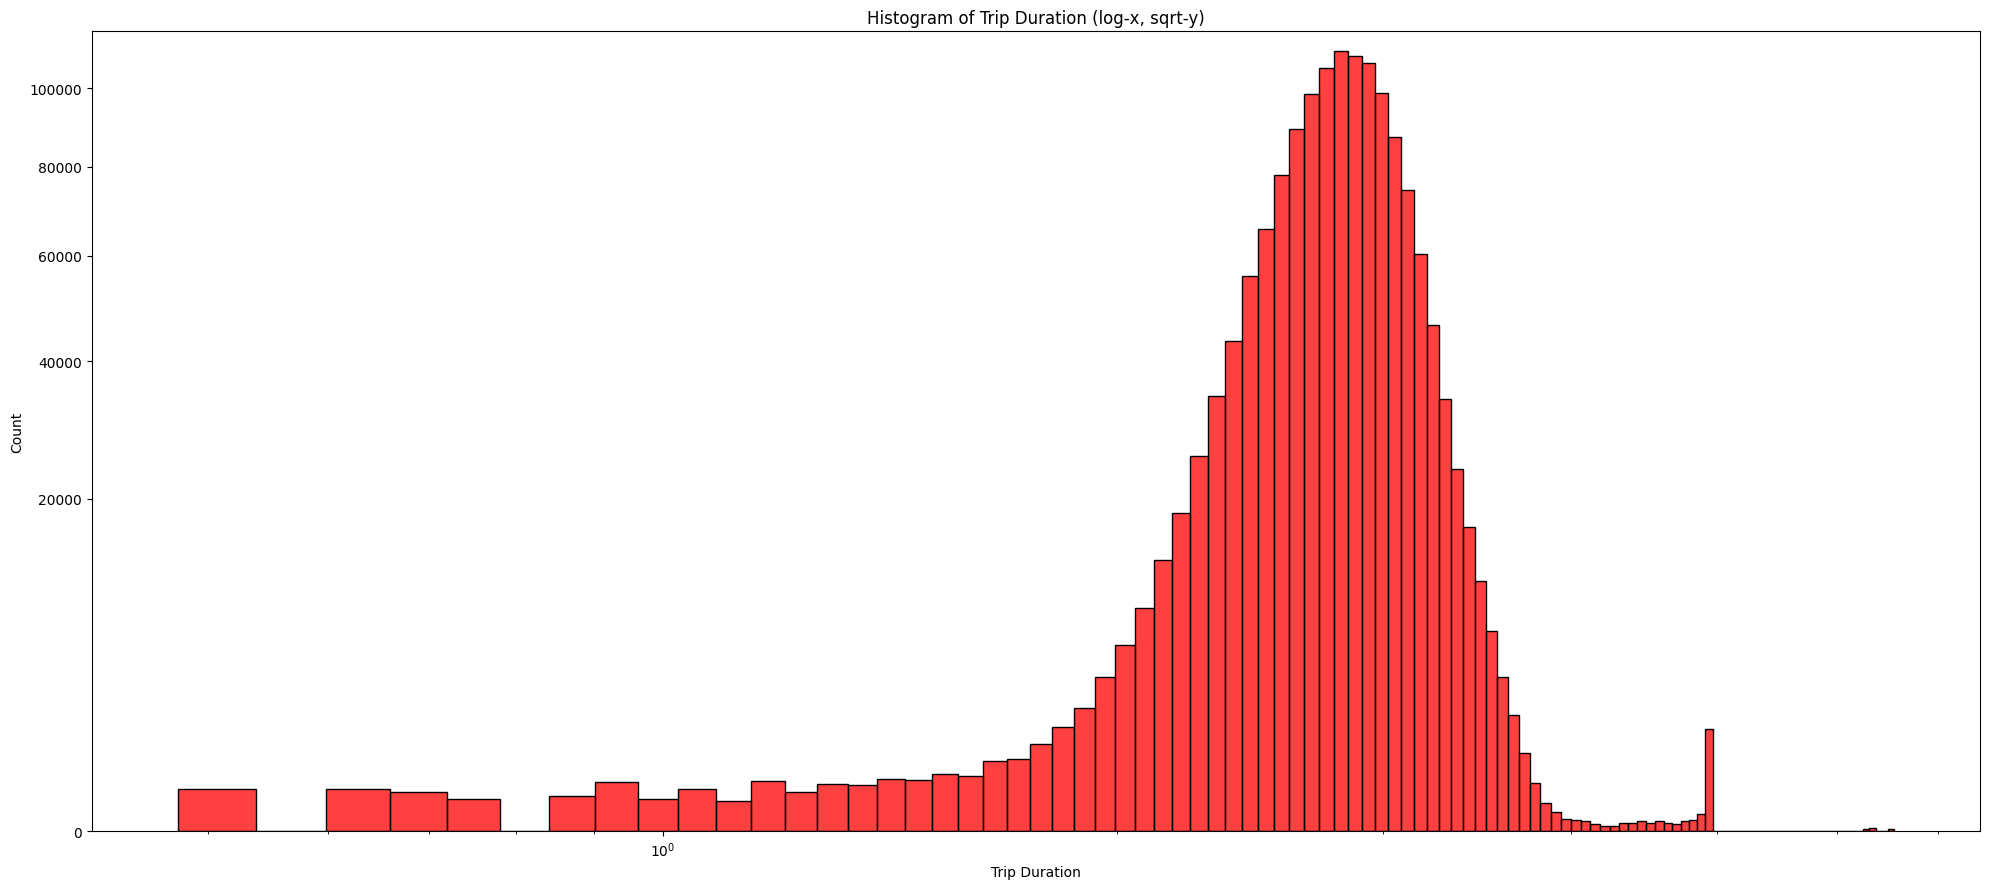

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered = train[train["trip_duration"] > 2].copy()

# Plot
plt.figure(figsize=(20, 9))
sns.histplot(
    np.log10(filtered['trip_duration']), 
    bins=100, 
    color="red"
)

# Custom sqrt scale for y-axis
def sqrt_transform(y):
    return np.sqrt(y)
def sqrt_inverse(y):
    return y**2

plt.xscale("log")         # Log10 scale for x-axis
plt.yscale('function', functions=(sqrt_transform, sqrt_inverse))
plt.xlabel("Trip Duration")
plt.ylabel("Count")
plt.title("Histogram of Trip Duration (log-x, sqrt-y)")
plt.tight_layout()
plt.show()

# Arcsinh transformation
# plt.figure(figsize=(20, 9))
# sns.histplot(np.arcsinh(df["trip_duration"]), bins=150, color="red")
# plt.xlabel("arcsinh(trip_duration)")
# plt.show()

In [127]:
def custom_summary(df):
    summary = df.describe()
    summary.loc['median'] = df.median()
    summary.loc['mode'] = df.mode().iloc[0]
    summary.loc['skew'] = df.skew()
    summary.loc['kurtosis'] = df.kurtosis()
    summary.loc['5%'] = df.quantile(0.05)
    summary.loc['95%'] = df.quantile(0.95)
    return summary

print(custom_summary(train.trip_duration))

count      1458644.000
mean           959.492
std           5237.432
min              1.000
25%            397.000
50%            662.000
75%           1075.000
max        3526282.000
median         662.000
mode           368.000
skew           343.164
kurtosis    192131.517
5%             180.000
95%           2104.000
Name: trip_duration, dtype: float64


**Notable things from this image**
- 

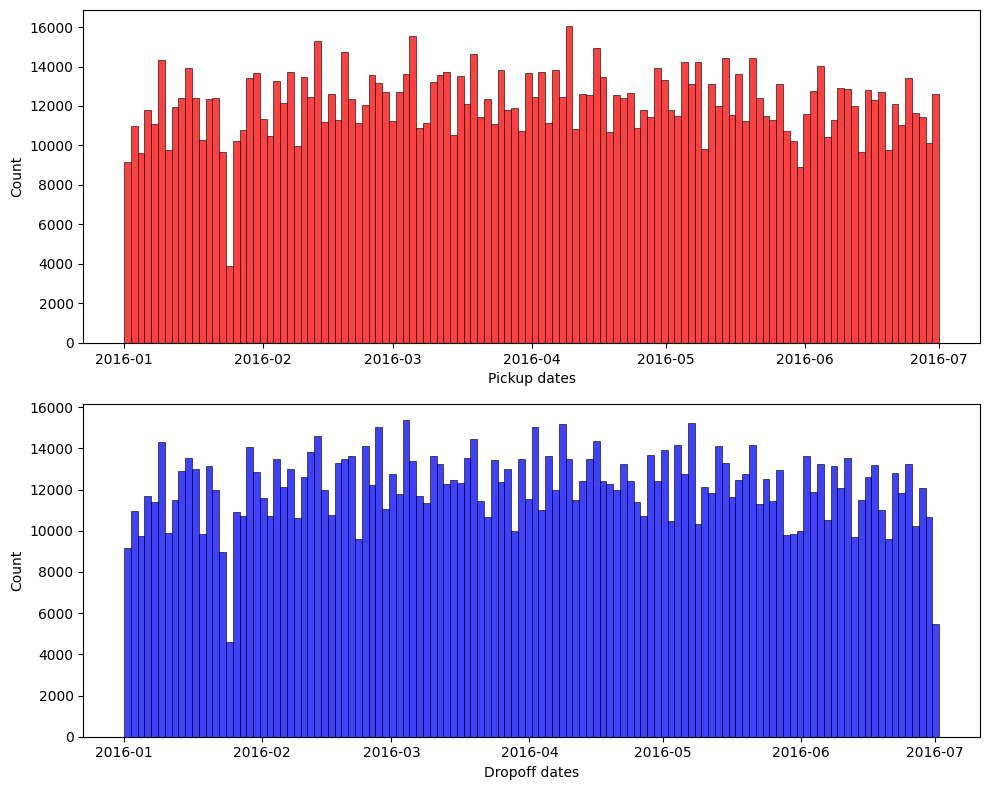

In [141]:
fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=False)

# Pickup datetime histogram
sns.histplot(train['pickup_datetime'], bins=120, color='red', ax=axes[0])
axes[0].set_xlabel("Pickup dates")
axes[0].set_ylabel("Count")

# Dropoff datetime histogram
sns.histplot(train['dropoff_datetime'], bins=120, color='blue', ax=axes[1])
axes[1].set_xlabel("Dropoff dates")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

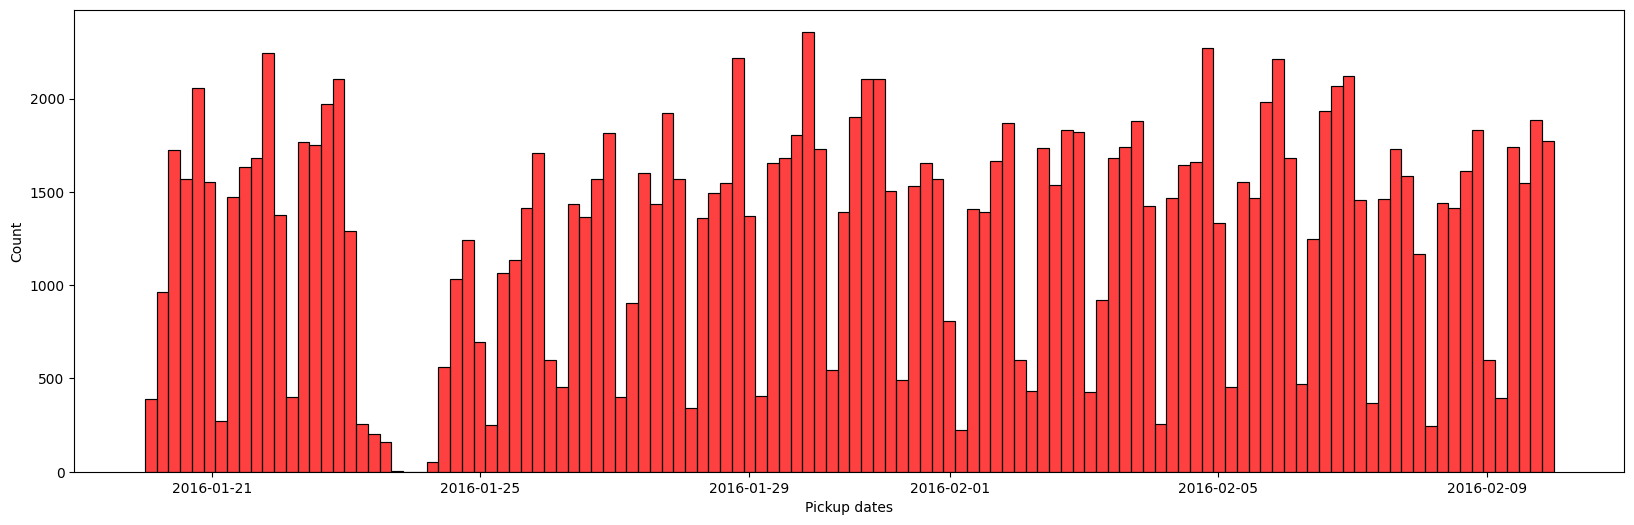

In [143]:
filtered = train[
    (train['pickup_datetime'] > pd.to_datetime("2016-01-20")) &
    (train['pickup_datetime'] < pd.to_datetime("2016-02-10"))
]
plt.figure(figsize=(20,6))
sns.histplot(filtered['pickup_datetime'], bins=120, color='red')
plt.xlabel("Pickup dates")
plt.ylabel("Count")
plt.show()

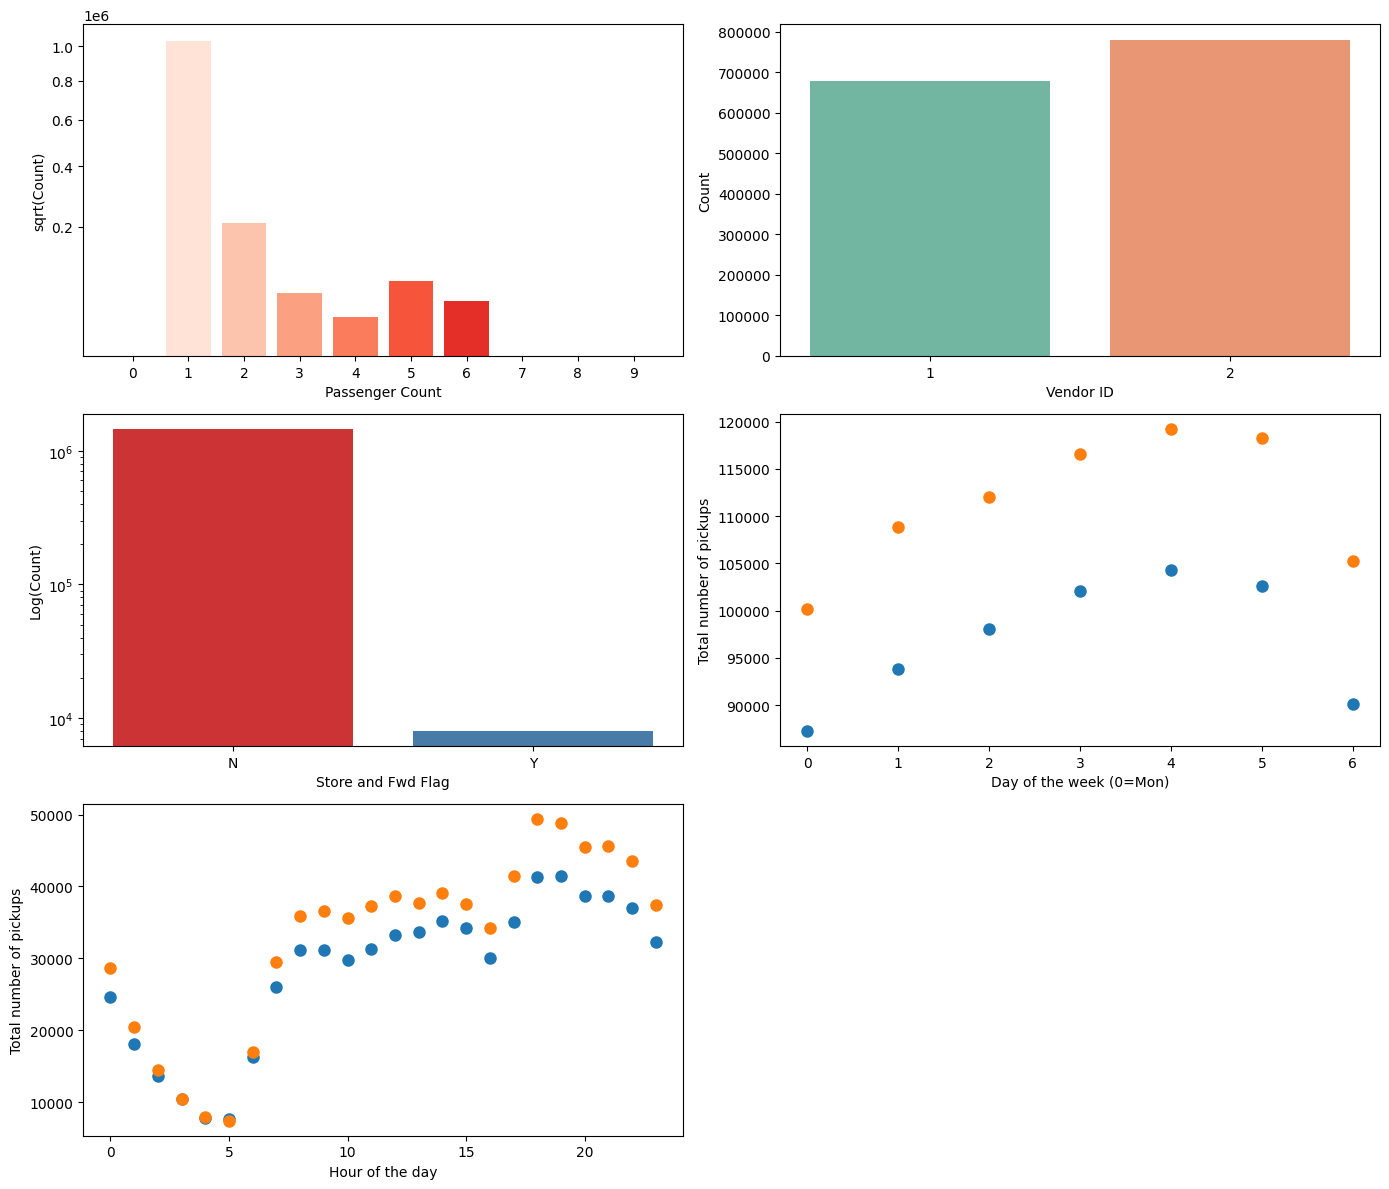

In [148]:
fig, axes = plt.subplots(3, 2, figsize=(14,12))

# 1. Passenger count barplot (y=sqrt), fix: convert index to int for color scaling
passenger_counts = train['passenger_count'].value_counts().sort_index()
index_numeric = passenger_counts.index.astype(int)
axes[0, 0].bar(
    passenger_counts.index.astype(str),  # show as category labels
    passenger_counts.values,
    color=plt.cm.Reds(index_numeric / max(index_numeric))
)
axes[0, 0].set_yscale('function', functions=(np.sqrt, lambda y: y ** 2))
axes[0, 0].set_xlabel("Passenger Count")
axes[0, 0].set_ylabel("sqrt(Count)")

# 2. Vendor ID barplot (no legend)
sns.countplot(x='vendor_id', hue='vendor_id', data=train, ax=axes[0, 1], palette='Set2', legend=False)
axes[0, 1].set_xlabel("Vendor ID")
axes[0, 1].set_ylabel("Count")

# 3. Store and fwd flag barplot (no legend)
sns.countplot(x='store_and_fwd_flag', hue='store_and_fwd_flag', data=train, ax=axes[1, 0], palette='Set1', legend=False)
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlabel("Store and Fwd Flag")
axes[1, 0].set_ylabel("Log(Count)")

# 4. Pickups by weekday and vendor (scatter)
pickup_by_day_vendor = train.groupby(['wday', 'vendor_id'], observed=True).size().reset_index(name='n')
for vendor_id, grp in pickup_by_day_vendor.groupby('vendor_id', observed=True):
    axes[1, 1].scatter(grp['wday'], grp['n'], label=f'Vendor {vendor_id}', s=64)
axes[1, 1].set_xlabel("Day of the week (0=Mon)")
axes[1, 1].set_ylabel("Total number of pickups")

# 5. Pickups by hour and vendor (scatter)
pickup_by_hour_vendor = train.groupby(['hpick', 'vendor_id'], observed=True).size().reset_index(name='n')
for vendor_id, grp in pickup_by_hour_vendor.groupby('vendor_id', observed=True):
    axes[2, 0].scatter(grp['hpick'], grp['n'], label=f'Vendor {vendor_id}', s=64)
axes[2, 0].set_xlabel("Hour of the day")
axes[2, 0].set_ylabel("Total number of pickups")

# Hide the last subplot (bottom right) if not used
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

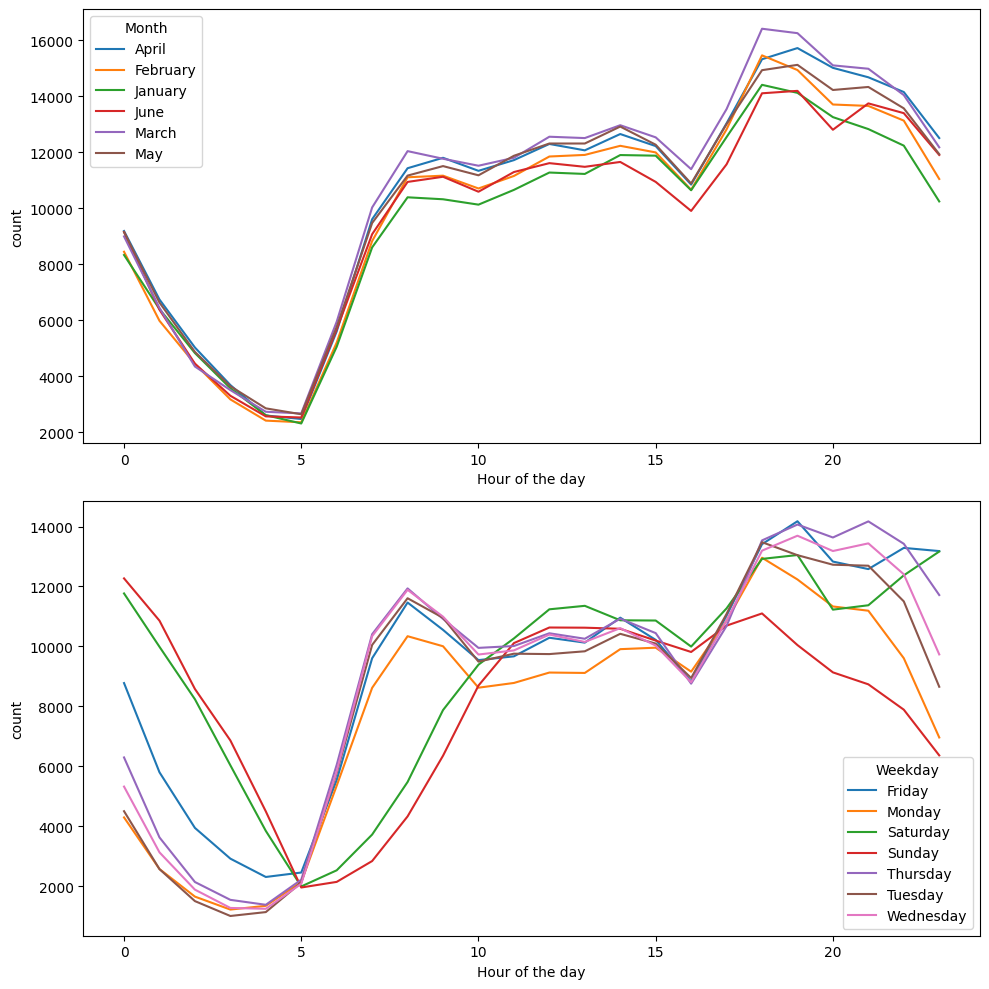

In [140]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# By hour and month
train['hpick'] = train['pickup_datetime'].dt.hour
train['Month'] = train['pickup_datetime'].dt.month_name()
hour_month = train.groupby(['hpick', 'Month']).size().reset_index(name='n')
for month, grp in hour_month.groupby('Month'):
    axes[0].plot(grp['hpick'], grp['n'], label=month)
axes[0].set_xlabel("Hour of the day")
axes[0].set_ylabel("count")
axes[0].legend(title='Month')

# By hour and weekday
train['wday'] = train['pickup_datetime'].dt.day_name()
hour_wday = train.groupby(['hpick', 'wday']).size().reset_index(name='n')
for wday, grp in hour_wday.groupby('wday'):
    axes[1].plot(grp['hpick'], grp['n'], label=wday)
axes[1].set_xlabel("Hour of the day")
axes[1].set_ylabel("count")
axes[1].legend(title='Weekday')

plt.tight_layout()
plt.show()

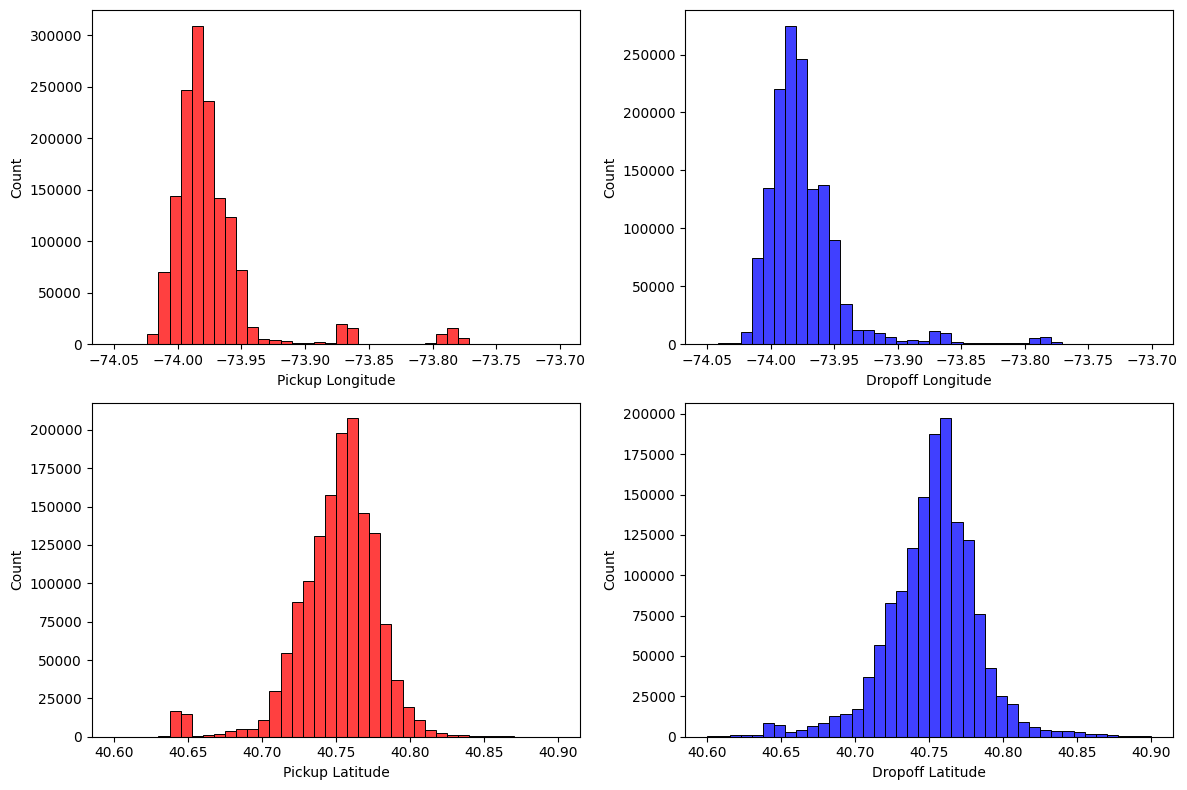

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# Pickup longitude
sns.histplot(
    train[(train['pickup_longitude'] > -74.05) & (train['pickup_longitude'] < -73.7)]['pickup_longitude'],
    bins=40, color='red', ax=axes[0,0]
)
axes[0,0].set_xlabel("Pickup Longitude")
axes[0,0].set_ylabel("Count")

# Dropoff longitude
sns.histplot(
    train[(train['dropoff_longitude'] > -74.05) & (train['dropoff_longitude'] < -73.7)]['dropoff_longitude'],
    bins=40, color='blue', ax=axes[0,1]
)
axes[0,1].set_xlabel("Dropoff Longitude")
axes[0,1].set_ylabel("Count")

# Pickup latitude
sns.histplot(
    train[(train['pickup_latitude'] > 40.6) & (train['pickup_latitude'] < 40.9)]['pickup_latitude'],
    bins=40, color='red', ax=axes[1,0]
)
axes[1,0].set_xlabel("Pickup Latitude")
axes[1,0].set_ylabel("Count")

# Dropoff latitude
sns.histplot(
    train[(train['dropoff_latitude'] > 40.6) & (train['dropoff_latitude'] < 40.9)]['dropoff_latitude'],
    bins=40, color='blue', ax=axes[1,1]
)
axes[1,1].set_xlabel("Dropoff Latitude")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()